In [135]:
# import pandas as pd
# from imblearn.over_sampling import SMOTE
# from collections import Counter

# # Load your dataset here (replace 'your_dataset.csv' with your actual dataset file)
# data = pd.read_csv('AllTogethertest.csv')
# # data = pd.read_csv('AllTogetherHvL2.csv')

# # Assuming 'material_type' is the column that indicates the material type
# X = data.drop(columns=['Material_Type'])
# y = data['Material_Type']

# # Initialize SMOTE with the desired number of samples for each class (e.g., 100)
# desired_samples = 6000
# smote = SMOTE(sampling_strategy={material_type: desired_samples for material_type in y.unique()})

# # Apply SMOTE to the dataset
# X_resampled, y_resampled = smote.fit_resample(X, y)

# # Check the new class distribution
# print("Class distribution after SMOTE:", Counter(y_resampled))

# # Now you can use X_resampled and y_resampled as your balanced dataset

# # Create a new DataFrame with the resampled data
# resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
# resampled_data['Material_Type'] = y_resampled

# # Save the resampled data to a CSV file
# resampled_data.to_csv('test_resampled.csv', index=False)


In [136]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.callbacks import EarlyStopping

# Load the dataset
data = pd.read_csv("test_resampled.csv")
# data = pd.read_csv("AllTogethertest.csv")
# data = pd.read_csv("resampled_dataset8_PVC.csv")


# Separate features and labels
X = data.drop(columns=["Material_Type"])
y = data["Material_Type"]


In [137]:
# Encode labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Split the data into train and test sets (Normal)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

# # Normalize features
# X_train_normalized = (X_train - X_train.min()) / (X_train.max() - X_train.min())
# X_test_normalized = (X_test - X_train.min()) / (X_train.max() - X_train.min())
X_train_normalized = ((X_train - 0) / (8410000 - 0))
X_test_normalized = ((X_test - 0) / (8410000 - 0))

# Define the model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    # tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(len(label_encoder.classes_), activation="softmax")
])

Epoch 1/500
58/58 [==============================] - 1s 4ms/step - loss: 1.4940 - accuracy: 0.3644 - val_loss: 1.3251 - val_accuracy: 0.5710
Epoch 2/500
58/58 [==============================] - 0s 2ms/step - loss: 1.1981 - accuracy: 0.5687 - val_loss: 1.0730 - val_accuracy: 0.5899
Epoch 3/500
58/58 [==============================] - 0s 2ms/step - loss: 1.0089 - accuracy: 0.6260 - val_loss: 0.9290 - val_accuracy: 0.6675
Epoch 4/500
58/58 [==============================] - 0s 2ms/step - loss: 0.8986 - accuracy: 0.6588 - val_loss: 0.8550 - val_accuracy: 0.6658
Epoch 5/500
58/58 [==============================] - 0s 2ms/step - loss: 0.8369 - accuracy: 0.6788 - val_loss: 0.7996 - val_accuracy: 0.7166
Epoch 6/500
58/58 [==============================] - 0s 2ms/step - loss: 0.7925 - accuracy: 0.6971 - val_loss: 0.7540 - val_accuracy: 0.7313
Epoch 7/500
58/58 [==============================] - 0s 2ms/step - loss: 0.7578 - accuracy: 0.7145 - val_loss: 0.7341 - val_accuracy: 0.7212
Epoch 8/500
5

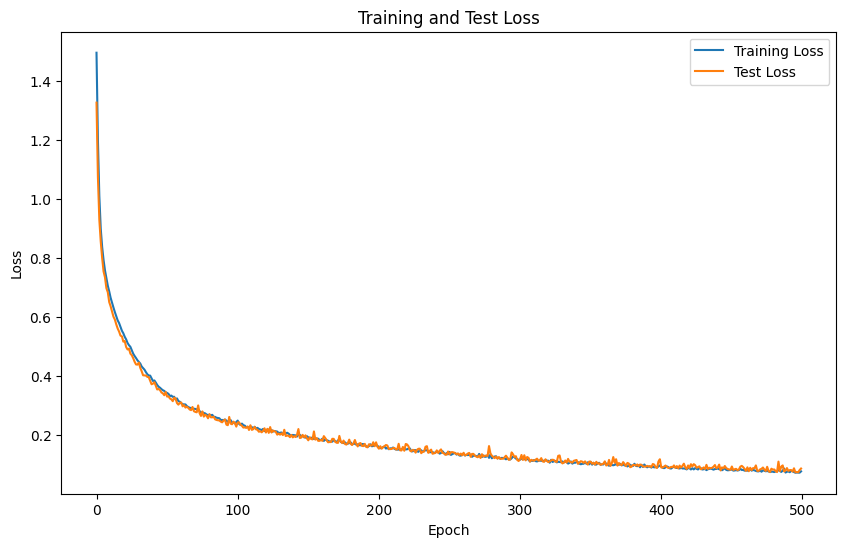

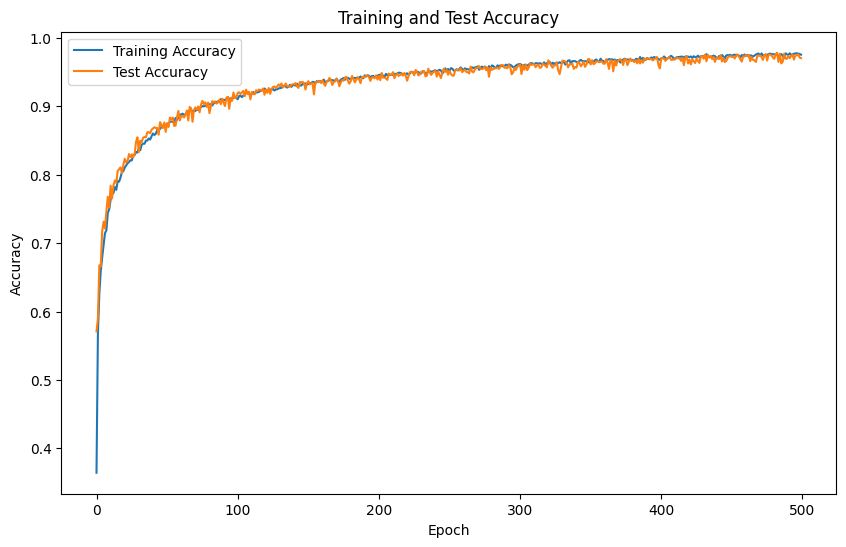

In [138]:
# Compile the model
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Define early stopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

# Train the model with early stopping
history = model.fit(X_train_normalized, y_train, epochs=500, batch_size=256, validation_split=0.3, callbacks=[early_stopping])
# history = model.fit(X_train_normalized, y_train, epochs=500, batch_size=256, validation_split=0.2)

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test_normalized, y_test)

# Save the model
# model.save("15_point_plastic_classifier_model_30_09.keras")
# model.save("3_point_plastic_classifier_model.keras")
# model.save("test_model.keras")

# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss')
plt.legend()
plt.show()

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Test Accuracy')
plt.legend()
plt.show()



In [139]:
# Make predictions
predictions = model.predict(X_test_normalized)
predicted_labels = np.argmax(predictions, axis=1)
predicted_plastic_types = label_encoder.inverse_transform(predicted_labels)



# Convert predictions to percentage likelihood
percentage_likelihood = predictions.max(axis=1) * 100

# Display test accuracy and example predictions
print(f"Test Accuracy: {test_accuracy}")
for i in range(15):
    if y_test[i] == predicted_labels[i]:
        CorF = "Correct"
    else:
        CorF = "False"
    print(f"Sample {i+1}: {CorF} Predicted {predicted_plastic_types[i]} with {percentage_likelihood[i]:.2f}% likelihood")




total_params = model.count_params()
total_size_bytes = total_params * 4  # Each parameter is usually a 32-bit float
total_size_mb = total_size_bytes / (1024)  # Convert bytes to megabytes

print(f"Total size of the model: {total_size_mb:.2f} KB")


282/282 [==============================] - 0s 611us/step
Test Accuracy: 0.9692222476005554
Sample 1: Correct Predicted PE with 96.66% likelihood
Sample 2: Correct Predicted PVC with 100.00% likelihood
Sample 3: Correct Predicted PVC with 100.00% likelihood
Sample 4: Correct Predicted Unknown with 96.28% likelihood
Sample 5: Correct Predicted PE with 99.93% likelihood
Sample 6: Correct Predicted PET with 92.22% likelihood
Sample 7: Correct Predicted PE with 99.52% likelihood
Sample 8: Correct Predicted PET with 99.98% likelihood
Sample 9: Correct Predicted PET with 100.00% likelihood
Sample 10: Correct Predicted PVC with 94.75% likelihood
Sample 11: Correct Predicted PET with 100.00% likelihood
Sample 12: Correct Predicted PVC with 95.70% likelihood
Sample 13: Correct Predicted PE with 99.79% likelihood
Sample 14: Correct Predicted PP with 97.83% likelihood
Sample 15: Correct Predicted PP with 96.69% likelihood
Total size of the model: 41.52 KB


In [140]:
# Make predictions
predictions = model.predict(X_test_normalized)

# Get the top 4 predictions for each sample
top_predictions = np.argsort(predictions, axis=1)[:, -5:]
top_labels = top_predictions[:, ::-1]

# print(predictions)

# Reshape the top_labels array to be 1D
top_labels_1d = top_labels.reshape(-1)

# Inverse transform the labels
top_plastic_types = label_encoder.inverse_transform(top_labels_1d)

# Reshape the top_plastic_types array back to 2D
top_plastic_types = top_plastic_types.reshape(top_labels.shape)

# Get the percentage likelihoods for the top 4 predictions
percentage_likelihoods = np.take_along_axis(predictions, top_predictions, axis=1) * 100

# Display test accuracy and example predictions
print(f"Test Accuracy: {test_accuracy}")
for i in range(len(predicted_labels)):
    num_predictions = min(5, len(np.unique(top_labels[i])))
    if y_test[i] == predicted_labels[i]:
        CorF = "Correct,"
    else:
        CorF = "False,"
    print(f"Sample {i+1}: {CorF} it was {label_encoder.classes_[y_test[i]]}")
    for j in range(num_predictions):
        print(f"  Prediction {j+1}: {top_plastic_types[i][j]} with {percentage_likelihoods[i][1-j]:.2f}% likelihood") #put in '1' for HvL and '3' for the others

282/282 [==============================] - 0s 792us/step
Test Accuracy: 0.9692222476005554
Sample 1: Correct, it was PE
  Prediction 1: PE with 0.00% likelihood
  Prediction 2: PP with 0.00% likelihood
  Prediction 3: Unknown with 96.66% likelihood
  Prediction 4: PVC with 2.60% likelihood
  Prediction 5: PET with 0.75% likelihood
Sample 2: Correct, it was PVC
  Prediction 1: PVC with 0.00% likelihood
  Prediction 2: Unknown with 0.00% likelihood
  Prediction 3: PP with 100.00% likelihood
  Prediction 4: PE with 0.00% likelihood
  Prediction 5: PET with 0.00% likelihood
Sample 3: Correct, it was PVC
  Prediction 1: PVC with 0.00% likelihood
  Prediction 2: Unknown with 0.00% likelihood
  Prediction 3: PP with 100.00% likelihood
  Prediction 4: PET with 0.00% likelihood
  Prediction 5: PE with 0.00% likelihood
Sample 4: Correct, it was Unknown
  Prediction 1: Unknown with 0.00% likelihood
  Prediction 2: PET with 0.00% likelihood
  Prediction 3: PP with 96.28% likelihood
  Prediction 4:

In [141]:
# Get manual input from the user
manual_input = np.array([[1365889,2383139,3943193,6364119,6459881,3520279,1572135,859381,1734251,3039005,5108675,6392189,4980199,2559117,1249619]])  # Replace with your input values

# Normalize the manual input if needed
normalized_manual_input = ((manual_input - 0) / (8388608 - 0))

# Make predictions on manual input
predictions = model.predict(normalized_manual_input)
print(predictions)

# Get the top prediction
top_prediction = np.argmax(predictions)
print(top_prediction)

top_plastic_type = label_encoder.inverse_transform([top_prediction])[0]
print(top_plastic_type)
likelihood = predictions[0][top_prediction] * 100

# Display the prediction for manual input
print(f"Manual Input Prediction:")
print(f"  Prediction: {top_plastic_type} with {likelihood:.2f}% likelihood")

1/1 [==============================] - 0s 76ms/step
[[4.2242158e-02 5.0740014e-21 9.5775735e-01 7.2649149e-17 4.3281005e-07]]
2
PP
Manual Input Prediction:
  Prediction: PP with 95.78% likelihood


In [142]:
# Make predictions from manual
manual_input = np.array([[1365889,2383139,3943193,6364119,6459881,3520279,1572135,859381,1734251,3039005,5108675,6392189,4980199,2559117,1249619
]])

# Calculate the column-wise min and max values from your original dataset
min_values = [74296, 1151721, 2379300, 2748695, 3681840, 1997402, 1742243, 942818, 392145, 795677, 1406647, 2482140, 2630495, 1748806, 1249297]
max_values = [1773075, 3755206, 7787954, 8401566, 8405071, 8401566, 7232265, 8185313, 2080604, 4455589, 8402979, 8405071, 8405071, 8403086, 6084492]

# Convert the lists to numpy arrays
min_values = np.array(min_values)
max_values = np.array(max_values)

# Normalize the manual input using the calculated min and max values
normalized_manual_input = (manual_input - min_values) / (max_values - min_values)
# normalized_manual_input = np.array([[0.85611,0.63202,0.53239,0.41068,0.59174,0.39869,0.44654,0.42188,0.8826042,0.67470967,0.34701898,0.42024683,0.34977269,0.16862726,0.1471771]])

print(normalized_manual_input)

predictions = model.predict(normalized_manual_input)
predicted_labels = np.argmax(predictions, axis=1)
predicted_plastic_types = label_encoder.inverse_transform(predicted_labels)

    
## Calculate the percentage likelihoods
percentage_likelihoods = predictions * 100

# Get the indices of the top 4 predicted classes based on percentage likelihoods
top_indices = np.argsort(percentage_likelihoods[0])[::-1][:4]

# Get the labels for the top predicted classes
top_labels = label_encoder.inverse_transform(top_indices)

# Get the predicted label
predicted_label = top_labels[0]

# Get the true label from the original data (replace with your true label)
true_label = 'ALU'  # Replace with the true label

# Calculate the accuracy
if predicted_label == true_label:
    accuracy = "Correct"
else:
    accuracy = "False"

# Print the prediction, label, and accuracy
print(f"Predicted label: {predicted_label}")
print(f"True label: {true_label}")
print(f"Accuracy: {accuracy}")

# Print the percentages for each type
for label, likelihood in zip(top_labels, percentage_likelihoods[0][top_indices]):
    print(f"{label}: {likelihood:.2f}% likelihood")

[[ 7.60306667e-01  4.72988321e-01  2.89146431e-01  6.39573059e-01
   5.88165389e-01  2.37794816e-01 -3.09849396e-02 -1.15204774e-02
   7.94870352e-01  6.12945885e-01  5.29138411e-01  6.60154407e-01
   4.06905026e-01  1.21772904e-01  6.65950391e-05]]
1/1 [==============================] - 0s 28ms/step


Predicted label: PE
True label: ALU
Accuracy: False
PE: 100.00% likelihood
PP: 0.00% likelihood
Unknown: 0.00% likelihood
PVC: 0.00% likelihood


In [143]:
# model.save("15_point_plastic_classifier_model_2_10_HvL.keras")